In [1]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime

mt5.initialize()
account=51434456 
password="51469692"
server = 'ICMarkets-Demo'

In [6]:
from_date=datetime(2020,1,1)
to_date=datetime.now()
deals=mt5.history_deals_get(from_date, to_date)

In [22]:
class HistoryRetrieval:
    
    def __init__(self, history):
        self.data = history
    
    def model_selection(self, history, model): # Use previous history as data. 'model' refers to what model you'd like to find the history of
        model_history = []
        ticket_info = {}
        for position in history:
            if position.comment == model:
                ticket_info[position.time] = position.ticket
            
        for time, ticket in ticket_info.items():
            for position in history:
                if position.ticket == ticket:
                    if position.time > time:
                        lst = position.profit, position.symbol
                        model_history.append(lst)
                        
        model_history = pd.DataFrame(model_history)
        # model_history.columns = 'Profit', 'Symbols'
        
        return model_history
    
    def sym_model_select(self, history, model): # Additional function: able to sort through specific symbols too
        
        symbols = str(input('Which symbols would you like to iterate through?'))
        symbols = symbols.split()
        model_history = []
        
        for position in history:

            for symbol in symbols:
        
                if position.symbol == symbol:
                    if position.comment == model:
                        model_history.append(position)
                
        return model_history
    
    def model_selection(self, model): # Use previous history as data. 'model' refers to what model you'd like to find the history of
        history = self.data
        model_deals = []
        
        for position in history:
            if position.comment == model and position.profit != 0:
                time = datetime.fromtimestamp(position.time)
                lst = [time, position.symbol, position.profit]
                model_deals.append(lst)
        if len(model_deals) == 0:
            raise ValueError("No model found")
        df = pd.DataFrame(model_deals, columns = ['Date', 'Symbol', 'Profit'])
        
        model_deals = pd.DataFrame(model_deals)
        model_deals.columns = ['Date', 'Symbol', 'Profit']
        model_deals = model_deals.set_index('Date')
        
        return model_deals

class HistoryAnalysis:
    
    def __init__(self, dataset, name):
    
        self.data = dataset
        self.symbols = list(dataset['Symbol'].unique())
        self.name = name
    
    def profit_analysis(self):
        
        
        self.data['Cumulative Profit'] = self.data['Profit'].cumsum()
        
        # Plotting Cumulative Profits for the Pairs Trading Strategy
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data['Cumulative Profit'], label= self.name, color='purple')
        plt.title(f'Cumulative Profits for {self.name} Strategy')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Profit')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Describing the Combined Returns
        combined_returns_summary = self.data['Profit'].describe()
        print(f"Combined Returns Summary for {self.name} :\n", combined_returns_summary)
    
data_hist = HistoryRetrieval(deals)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = data_hist.model_selection('EER')
df['Profit'].sum()

ValueError: No model found

In [43]:
analysis = HistoryAnalysis(df, 'granger_arima')

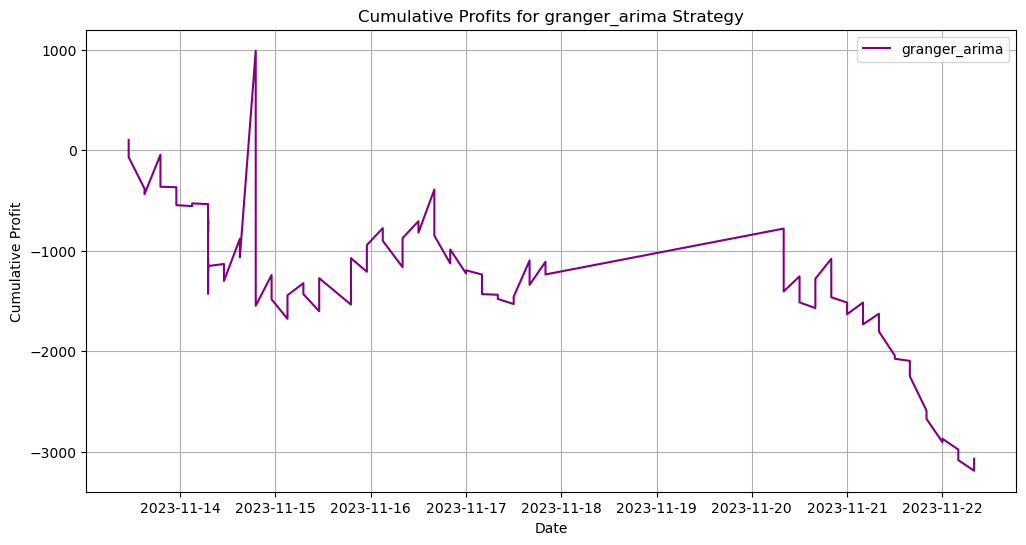

Combined Returns Summary for granger_arima :
 count      98.000000
mean      -31.342959
std       389.797013
min     -2538.800000
25%      -171.637500
50%       -48.140000
75%       105.775000
max      2056.630000
Name: Profit, dtype: float64


In [44]:
analysis.profit_analysis()

In [45]:
xgboost = data_hist.model_selection('granger_xgboost')
analysis = HistoryAnalysis(xgboost, 'granger_xgboost')

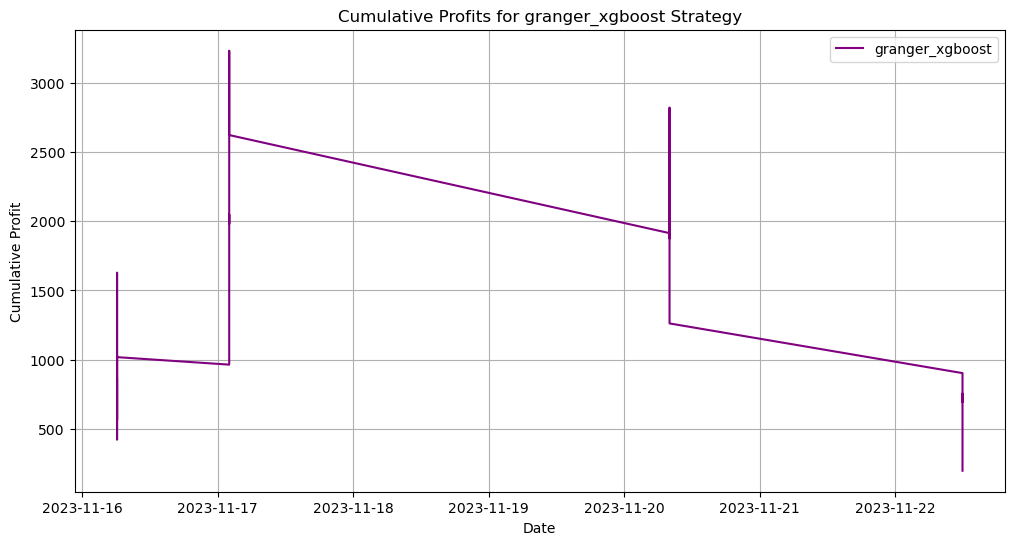

Combined Returns Summary for granger_xgboost :
 count      40.000000
mean        4.898750
std       454.834776
min      -949.940000
25%      -322.960000
50%        -2.455000
75%        99.900000
max      1160.980000
Name: Profit, dtype: float64


In [46]:
analysis.profit_analysis()

In [47]:
model_history = data_hist.model_selection(data_hist.data, 'grang_arima')
model_history

TypeError: HistoryRetrieval.model_selection() takes 2 positional arguments but 3 were given

In [25]:
data_hist.sym_model_select(data_hist.data, 'Regres Close')

Which symbols would you like to iterate through? 3


[]